In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
data = pd.read_csv("1.csv")

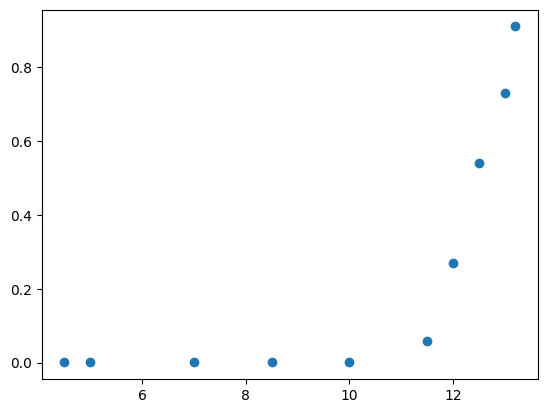

In [14]:
plt.scatter(data["I[A]"], data['P[Wt]'])